# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

**NOTE:** The DataFrame used in this Analysis is Filtered on the negatively commented users & the negative text and keywords used from the comments analysis

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have two main datasets**: <br>
>(The datasets screaped from **Instagram**).
> - 1- A dataset with posts data.
> - 2- A dataset with comments data.

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
import pickle

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, draw_heatmap, facet_heat, facet_days, SameText

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline

In [2]:
os.chdir("../Data")

In [3]:
ls

1Mil Instagram AH SNA comments.zip
Instagram Posts - AH 2018-2021 study 193K.zip
Instagram SNA AH comments.zip
comments.csv
comments_cleaned.csv
comments_text.csv
negative_text.pkl
negative_users.pkl
posts.csv
posts_cleaned.csv


In [4]:
original_posts = pd.read_csv('posts.csv')
print(original_posts.shape)
original_posts.head()

(193967, 16)


,id,shortcode,display_url,display_resources,is_video,edge_media_to_caption.edges,location.id,location.has_public_page,location.name,location.slug,location.address_json,from.id,from.username,from.url,location,taken_at_timestamp
0,2312672024680952662,2312672024680952662,https://instagram.fmci2-1.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fmci2-1.fna.fbcdn....,False,[{'node': {'text': 'According to the Digital t...,255561330.0,True,Hollywood,hollywood,"{""street_address"": """", ""zip_code"": ""90028"", ""c...",32529918546,cinescenes_,https://www.instagram.com/cinescenes_,NaN,NaN
1,2337634847974873162,2337634847974873162,https://scontent-lax3-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-lax3-1.cdninstagram...,False,[{'node': {'text': 'My girl❤️'}}],NaN,NaN,NaN,NaN,NaN,3988263563,scarlettjohansonoffcial,https://www.instagram.com/scarlettjohansonoffcial,NaN,NaN
2,2383123126627446477,2383123126627446477,https://scontent-lga3-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-lga3-1.cdninstagram...,False,[{'node': {'text': '❤❤❤\n#eizagonzalez #alexan...,212999109.0,True,"Los Angeles, California",los-angeles-california,"{""street_address"": """", ""zip_code"": """", ""city_n...",38331031416,divine.hollywood.women,https://www.instagram.com/divine.hollywood.women,NaN,NaN
3,2389292367830952143,2389292367830952143,https://scontent-lga3-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-lga3-1.cdninstagram...,False,[{'node': {'text': 'Use #KarenGillanslover \nT...,NaN,NaN,NaN,NaN,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover,NaN,NaN
4,2484525220804152653,2484525220804152653,https://scontent-lga3-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-lga3-1.cdninstagram...,False,[{'node': {'text': '.\nجانی دپ به دنبال پروژه\...,NaN,NaN,NaN,NaN,NaN,7105766142,cinemafars.official,https://www.instagram.com/cinemafars.official,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='posts'></a>
## Posts

><ul>
 <li><a href="#top_posted">Top posted users</a></li>
 <li><a href="#captions">Captions</a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [5]:
df_posts = pd.read_csv("posts_cleaned.csv")
print(df_posts.shape)
df_posts.head()

(193967, 7)


,id,is_video,caption,location,user_id,username,account_url
0,2312672024680952662,False,According to the Digital trends: Visual effect...,Hollywood,32529918546,cinescenes_,https://www.instagram.com/cinescenes_
1,2337634847974873162,False,My girl❤️,NaN,3988263563,scarlettjohansonoffcial,https://www.instagram.com/scarlettjohansonoffcial
2,2383123126627446477,False,❤❤❤\n#eizagonzalez #alexandradaddario\n#jennif...,"Los Angeles, California",38331031416,divine.hollywood.women,https://www.instagram.com/divine.hollywood.women
3,2389292367830952143,False,Use #KarenGillanslover \nThe smile kills me.😍😍...,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover
4,2484525220804152653,False,.\nجانی دپ به دنبال پروژه\u200cای جدید جهت نقش...,NaN,7105766142,cinemafars.official,https://www.instagram.com/cinemafars.official


In [6]:
df_posts["id"] = df_posts["id"].astype("str")
df_posts["user_id"] = df_posts["user_id"].astype("str")
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193967 entries, 0 to 193966
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           193967 non-null  object
 1   is_video     193967 non-null  bool  
 2   caption      193586 non-null  object
 3   location     22682 non-null   object
 4   user_id      193967 non-null  object
 5   username     193967 non-null  object
 6   account_url  193967 non-null  object
dtypes: bool(1), object(6)
memory usage: 9.1+ MB


In [7]:
isnull(df_posts)

The number of NaNs in id: 0
The number of NaNs in is_video: 0
The number of NaNs in caption: 381
The number of NaNs in location: 171285
The number of NaNs in user_id: 0
The number of NaNs in username: 0
The number of NaNs in account_url: 0


In [8]:
total_posts = df_posts.shape[0]
total_posted_users = df_posts["username"].nunique()

In [9]:
print(f"total number of posts {total_posts} by {total_posted_users} users")

total number of posts 193967 by 36137 users


## Negative Text

In [10]:
# To Load the dictionary of negative text   
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f)
    
neg_text = set()
for key in neg_dict.keys():
    neg_text.add(key)
    
neg_text 

{' death',
 ' death ',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violence',
 'expos',
 'exposing her ass',
 'exposingamberheard',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamber',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @am

## Filter the data frame on captions containing negative keywords

In [11]:
df_posts.caption.isnull().sum()

381

In [12]:
df_posts.shape

(193967, 7)

In [13]:
# first we need to drop the NaNs in the caption column
# df_posts = df_posts[df_posts['caption'].notna()]
df_posts_neg = df_posts.dropna(subset=['caption'])

In [14]:
df_posts_neg = df_posts_neg[df_posts_neg.caption.str.contains('|'.join(neg_text))]
print(df_posts_neg.shape)
df_posts_neg.head()

(11535, 7)


,id,is_video,caption,location,user_id,username,account_url
3,2389292367830952143,False,Use #KarenGillanslover \nThe smile kills me.😍😍...,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover
21,2284264314024432586,False,#amber\n#amberheard #amberheardisanabuser\n#am...,NaN,8244142730,allaboutamberheard,https://www.instagram.com/allaboutamberheard
44,2424793886009164262,False,"The 22 📸-year-old, who attending the Cannes Fi...",NaN,8682440340,kristeen_stewarrt,https://www.instagram.com/kristeen_stewarrt
57,2316509445116749874,False,#boycottloreal #amberheard #johnnydepp #domest...,NaN,35884410125,menlyvibes,https://www.instagram.com/menlyvibes
71,2469408055960567417,True,I love Johnny sm he's the best guy in Hollywoo...,NaN,30323288244,nffanepage,https://www.instagram.com/nffanepage


In [15]:
df_posts_neg.caption.value_counts().head(10)

#AmberHeard is an #American #actress . She made her film debut in 2004 in the sports drama #FridayNightLights #model #Celebrity #Hollywood \n#Upcomingmovies :\xa0#Aquaman ,\xa0#LondonFields\n#series #TVShows : #CriminalMinds #ThePlayboyClub #HiddenPalms #Overhaulin\n#Movies : #JusticeLeague #MagicMike #MagicMikeXXL #driveangry #3daystokill and..                                                                                                                                                         51
#johnnydepp #justiceforjohnnydepp #johnnydeppisinnocent #WeStandWithJohnnyDepp \n#amberheardisaliar #amberheardisanabuser #amberheardusafraud #amberheardusagolddigger #amberturd #amberheard                                                                                                                                                                                                                                                                                                                    

## Negative Users

In [16]:
# To Load the dictionary negative commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [17]:
len(neg_users)

14511

## Filter the data frame on usernames commented negatively

In [18]:
df_posts.username.isnull().sum()

0

In [19]:
df_posts.shape

(193967, 7)

In [20]:
df_posts_sub2 = df_posts[df_posts.username.isin(neg_users)]
print(df_posts_sub2.shape)
df_posts_sub2.head()

(12956, 7)


,id,is_video,caption,location,user_id,username,account_url
16,1908637391091057643,False,"Repost @toddkrim It’s easy to be cynical, nega...",NaN,2078286518,amberheardit,https://www.instagram.com/amberheardit
27,2604641913295834897,True,Follow @alexandrradaddario_ 💋,NaN,33406416831,alexandrradaddario_,https://www.instagram.com/alexandrradaddario_
50,1943663541275322445,False,"Um die ganze Review zu sehen, einfach auf die ...",NaN,286745995,joker.reviews,https://www.instagram.com/joker.reviews
93,1953628915251663067,False,NEW! #AmberHeard on the set of #HERSMELL 😍❤️ w...,NaN,2078286518,amberheardit,https://www.instagram.com/amberheardit
102,1996582814535078408,False,"DC families! WW Fam, AquaFam and Shazam Family...",NaN,8637579322,superherofanboii,https://www.instagram.com/superherofanboii


In [21]:
df_posts_sub2.caption.value_counts().head()

.\n.\n.\n.\n.\n #chrisevans #handsome #steverogers #avengersendgame #captainamerica #steverogers #marvel #chrishemsworth #chrispratt #elizabetholsen #scarlettjohansson #paulrudd #chrispine #jakegyllenhaal #tomholland #michaelbjordan #sebastianstan #robertdowneyjr #muscle #fitnessmotivation #scotteastwood #dakotajohnson #amberheard #henrycavill #ryangosling #stephenamell #robertdowneyjr #tomhiddleston          134
.\n.\n.\n.\n.\n.\n #chrisevans #handsome #steverogers #avengersendgame #captainamerica #steverogers #marvel #chrishemsworth #chrispratt #elizabetholsen #scarlettjohansson #paulrudd #chrispine #jakegyllenhaal #tomholland #michaelbjordan #sebastianstan #robertdowneyjr #muscle #fitnessmotivation #scotteastwood #dakotajohnson #amberheard #henrycavill #ryangosling #stephenamell #robertdowneyjr #tomhiddleston        99
.\n.\n.\n.\n.\n.\n.\n #chrisevans #handsome #steverogers #avengersendgame #captainamerica #steverogers #marvel #chrishemsworth #chrispratt #elizabetholsen #scarlettjo

## Merge Both DataFrames (negative text and negative users)

In [22]:
df_posts_sub = pd.concat([df_posts_neg,df_posts_sub2]).drop_duplicates().reset_index(drop=True)
print(df_posts_sub.shape)
df_posts_sub.head()

(21026, 7)


,id,is_video,caption,location,user_id,username,account_url
0,2389292367830952143,False,Use #KarenGillanslover \nThe smile kills me.😍😍...,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover
1,2284264314024432586,False,#amber\n#amberheard #amberheardisanabuser\n#am...,NaN,8244142730,allaboutamberheard,https://www.instagram.com/allaboutamberheard
2,2424793886009164262,False,"The 22 📸-year-old, who attending the Cannes Fi...",NaN,8682440340,kristeen_stewarrt,https://www.instagram.com/kristeen_stewarrt
3,2316509445116749874,False,#boycottloreal #amberheard #johnnydepp #domest...,NaN,35884410125,menlyvibes,https://www.instagram.com/menlyvibes
4,2469408055960567417,True,I love Johnny sm he's the best guy in Hollywoo...,NaN,30323288244,nffanepage,https://www.instagram.com/nffanepage


In [23]:
df_posts_sub.caption.value_counts().head()

.\n.\n.\n.\n.\n #chrisevans #handsome #steverogers #avengersendgame #captainamerica #steverogers #marvel #chrishemsworth #chrispratt #elizabetholsen #scarlettjohansson #paulrudd #chrispine #jakegyllenhaal #tomholland #michaelbjordan #sebastianstan #robertdowneyjr #muscle #fitnessmotivation #scotteastwood #dakotajohnson #amberheard #henrycavill #ryangosling #stephenamell #robertdowneyjr #tomhiddleston          134
.\n.\n.\n.\n.\n.\n #chrisevans #handsome #steverogers #avengersendgame #captainamerica #steverogers #marvel #chrishemsworth #chrispratt #elizabetholsen #scarlettjohansson #paulrudd #chrispine #jakegyllenhaal #tomholland #michaelbjordan #sebastianstan #robertdowneyjr #muscle #fitnessmotivation #scotteastwood #dakotajohnson #amberheard #henrycavill #ryangosling #stephenamell #robertdowneyjr #tomhiddleston        99
.\n.\n.\n.\n.\n.\n.\n #chrisevans #handsome #steverogers #avengersendgame #captainamerica #steverogers #marvel #chrishemsworth #chrispratt #elizabetholsen #scarlettjo

<a id='top_posted'></a>
>### Top posted users
> <ul>
 <li><a href="#top_posted"><b>Top Negatively Posted Users</b></a></li>
 <li><a href="#captions">Negative Captions</a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [24]:
df_top_users_posts = get_top(
    df_posts_neg, col="username", n=10, column_name="username", count_name="n_posts"
)
df_top_users_posts

,username,n_posts
0,becauseitsjohnnydepp,432
1,ambe.rheard,344
2,johnguerr56,250
3,rebecca._ferguson,246
4,jd_sweetprince,234
5,_justice_for_johnnydepp,212
6,heard_addicted,199
7,exposingamberlheard,177
8,_dope_black_unicorn_,159
9,amberheard_edits,145


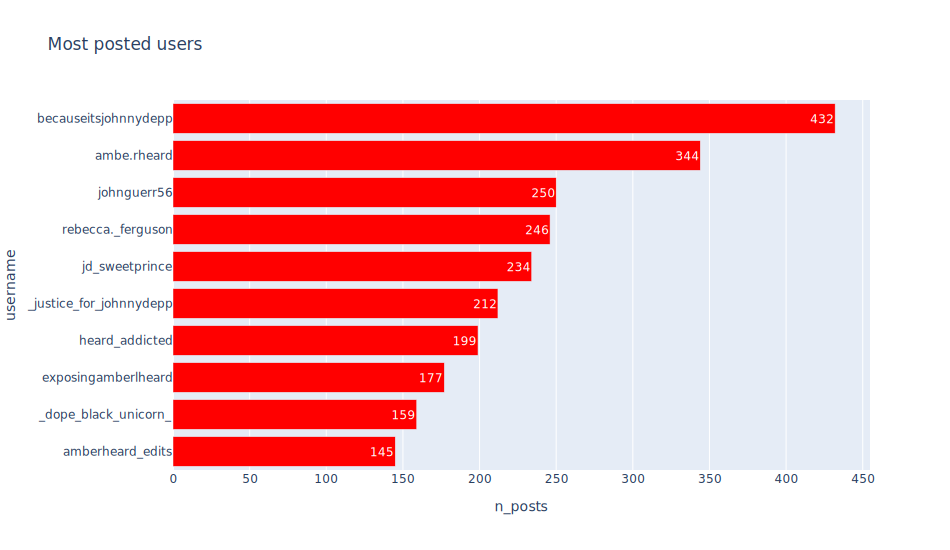

In [25]:
barh(df_top_users_posts, "Most posted users", 0)

<a id='captions'></a>
>### Captions
> <ul>
 <li><a href="#top_posted">Top Negatively Posted Users</a></li>
 <li><a href="#captions"><b>Negative Captions</b></a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [26]:
print(df_posts_neg.shape)
df_posts_neg.head()

(11535, 7)


,id,is_video,caption,location,user_id,username,account_url
3,2389292367830952143,False,Use #KarenGillanslover \nThe smile kills me.😍😍...,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover
21,2284264314024432586,False,#amber\n#amberheard #amberheardisanabuser\n#am...,NaN,8244142730,allaboutamberheard,https://www.instagram.com/allaboutamberheard
44,2424793886009164262,False,"The 22 📸-year-old, who attending the Cannes Fi...",NaN,8682440340,kristeen_stewarrt,https://www.instagram.com/kristeen_stewarrt
57,2316509445116749874,False,#boycottloreal #amberheard #johnnydepp #domest...,NaN,35884410125,menlyvibes,https://www.instagram.com/menlyvibes
71,2469408055960567417,True,I love Johnny sm he's the best guy in Hollywoo...,NaN,30323288244,nffanepage,https://www.instagram.com/nffanepage


In [27]:
df_posts_neg.caption.value_counts().head(20)

#AmberHeard is an #American #actress . She made her film debut in 2004 in the sports drama #FridayNightLights #model #Celebrity #Hollywood \n#Upcomingmovies :\xa0#Aquaman ,\xa0#LondonFields\n#series #TVShows : #CriminalMinds #ThePlayboyClub #HiddenPalms #Overhaulin\n#Movies : #JusticeLeague #MagicMike #MagicMikeXXL #driveangry #3daystokill and..                                                                                                                                                                                          51
#johnnydepp #justiceforjohnnydepp #johnnydeppisinnocent #WeStandWithJohnnyDepp \n#amberheardisaliar #amberheardisanabuser #amberheardusafraud #amberheardusagolddigger #amberturd #amberheard                                                                                                                                                                                                                                                                                   

<a id='image_video'></a>
>### Image or Video
> <ul>
 <li><a href="#top_posted">Top Negatively Posted Users</a></li>
 <li><a href="#captions">Negative Captions</a></li>  
 <li><a href="#image_video"><b>Image or Video</b></a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [28]:
df_posts["is_video"].value_counts()

False    175010
True      18957
Name: is_video, dtype: int64

In [29]:
image_video = df_posts["is_video"].value_counts().to_frame().reset_index()
image_video["index"] = ["image", "video"]
image_video.rename(columns={"index": "type", "is_video": "n_posts"}, inplace=True)
image_video

,type,n_posts
0,image,175010
1,video,18957


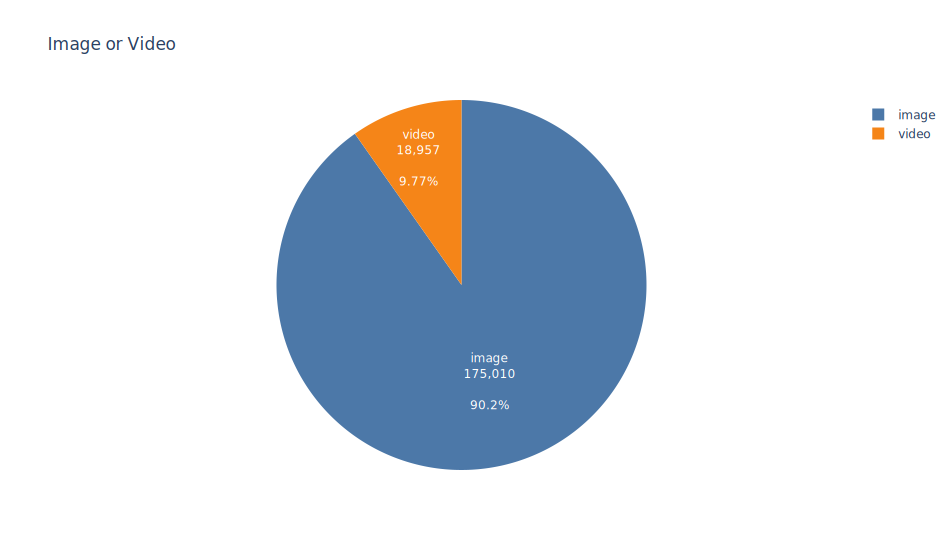

In [30]:
pie(image_video, "Image or Video")

<a id='loc'></a>
>### Locations
 <li><a href="#top_posted">Top Negatively Posted Users</a></li>
 <li><a href="#captions">Negative Captions</a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc"><b>Locations</b></a></li>  
 </ul>

In [31]:
top_locations = get_top(
    df_posts, col="location", n=10, column_name="location", count_name="n_posts"
)

In [32]:
top_locations

,location,n_posts
0,"Los Angeles, California",1786
1,"New York, New York",1370
2,"Jakarta, Indonesia",1087
3,"Adana, Turkey",842
4,Hollywood,415
5,"London, United Kingdom",309
6,"Paris, France",292
7,"Moscow, Russia",245
8,"Mexico City, Mexico",210
9,Atlantis,203


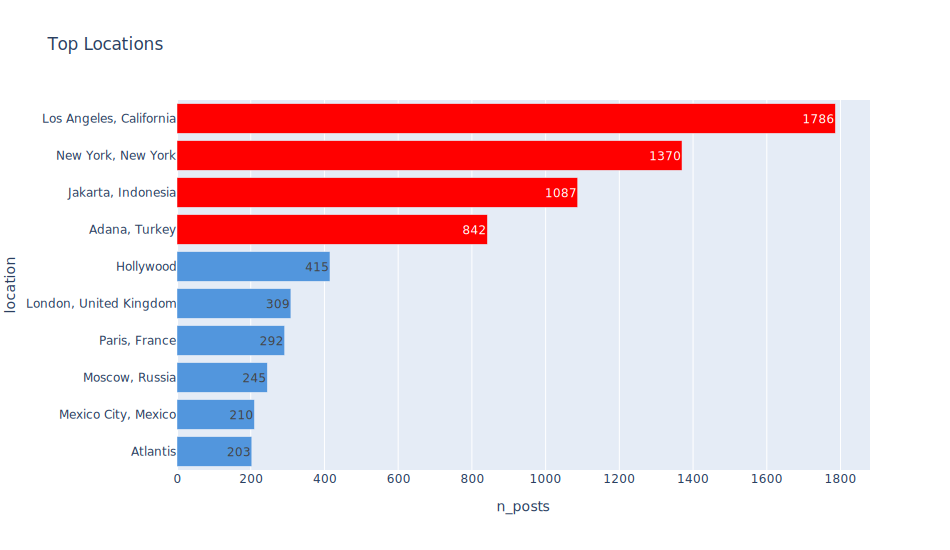

In [33]:
barh(top_locations, "Top Locations", 500)

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK